In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [75]:
#Assign name to our data set and read the data set
Shoppingtrends = pd.read_csv("shopping trends(Updated) 1.csv")
Shoppingtrends

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [76]:
#Checking data types in the data set
Shoppingtrends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [77]:
#Getting the number of rowa and columns
Shoppingtrends.shape

(3900, 18)

In [78]:
#Getting statistical data for the data set
Shoppingtrends.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [79]:
#Checking for null values
Shoppingtrends.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [80]:
#Checking for duplication
Shoppingtrends.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3895    False
3896    False
3897    False
3898    False
3899    False
Length: 3900, dtype: bool

In [81]:
#Column Headers information
Shoppingtrends.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [82]:
Location_unique=Shoppingtrends["Location"].unique()
Location_unique

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [83]:
#top 20 of the previous purchase
Previous_Purchases=Shoppingtrends.nlargest(20,"Previous Purchases")
Previous_Purchases

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
20,21,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,2.8,Yes,Express,Yes,Yes,50,Cash,Every 3 Months
78,79,50,Male,Skirt,Clothing,91,Nebraska,M,Maroon,Spring,4.7,Yes,Free Shipping,Yes,Yes,50,Venmo,Fortnightly
101,102,27,Male,Coat,Outerwear,85,North Dakota,XL,White,Spring,4.6,Yes,Express,Yes,Yes,50,Credit Card,Bi-Weekly
124,125,44,Male,Sweater,Clothing,86,Nevada,M,Gray,Spring,3.1,Yes,Next Day Air,Yes,Yes,50,PayPal,Annually
140,141,63,Male,Shirt,Clothing,28,North Carolina,L,Yellow,Fall,3.9,Yes,2-Day Shipping,Yes,Yes,50,Credit Card,Weekly
158,159,25,Male,Shirt,Clothing,73,Connecticut,XL,Teal,Fall,4.1,Yes,Standard,Yes,Yes,50,Bank Transfer,Monthly
290,291,58,Male,T-shirt,Clothing,33,Colorado,M,Indigo,Winter,3.7,Yes,Standard,Yes,Yes,50,PayPal,Weekly
310,311,56,Male,Pants,Clothing,85,Montana,M,Charcoal,Winter,4.6,Yes,Standard,Yes,Yes,50,Cash,Fortnightly
313,314,42,Male,Dress,Clothing,77,Vermont,M,Pink,Spring,3.7,Yes,Express,Yes,Yes,50,Credit Card,Every 3 Months
365,366,55,Male,Gloves,Accessories,88,West Virginia,XL,Gray,Summer,3.7,Yes,Standard,Yes,Yes,50,PayPal,Quarterly


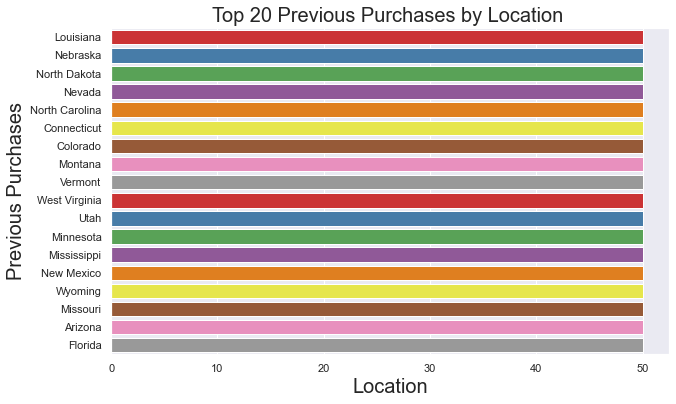

In [84]:
#Top 20 previous purchases by location
plt.figure(figsize=(10,6))
sns.barplot(x="Previous Purchases",y ="Location",data=Previous_Purchases,palette="Set1")
plt.title("Top 20 Previous Purchases by Location ",fontdict={"fontsize":20})
plt.xlabel("Location",size =20)
plt.ylabel("Previous Purchases",size= 20)
plt.show()

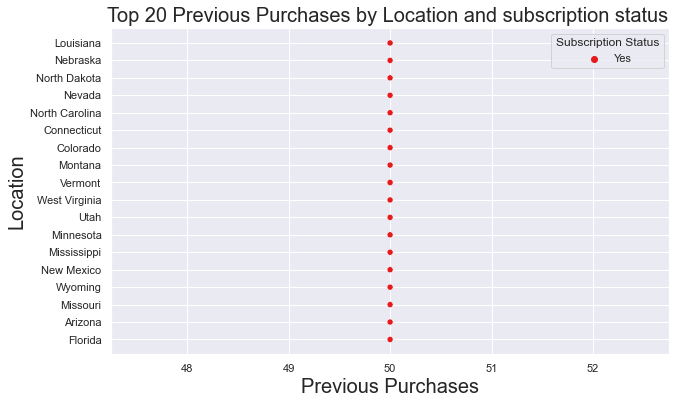

In [85]:
#Top 20 Previous Purchases by Location and Subscription Status 
plt.figure(figsize=(10,6))
sns.scatterplot(x="Previous Purchases",y="Location",data=Previous_Purchases,hue="Subscription Status",palette="Set1")
plt.title("Top 20 Previous Purchases by Location and subscription status ",fontdict={"fontsize":20})
plt.xlabel("Previous Purchases",size =20)
plt.ylabel("Location",size= 20)
plt.show()

In [86]:
Previous_Purchases

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
20,21,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,2.8,Yes,Express,Yes,Yes,50,Cash,Every 3 Months
78,79,50,Male,Skirt,Clothing,91,Nebraska,M,Maroon,Spring,4.7,Yes,Free Shipping,Yes,Yes,50,Venmo,Fortnightly
101,102,27,Male,Coat,Outerwear,85,North Dakota,XL,White,Spring,4.6,Yes,Express,Yes,Yes,50,Credit Card,Bi-Weekly
124,125,44,Male,Sweater,Clothing,86,Nevada,M,Gray,Spring,3.1,Yes,Next Day Air,Yes,Yes,50,PayPal,Annually
140,141,63,Male,Shirt,Clothing,28,North Carolina,L,Yellow,Fall,3.9,Yes,2-Day Shipping,Yes,Yes,50,Credit Card,Weekly
158,159,25,Male,Shirt,Clothing,73,Connecticut,XL,Teal,Fall,4.1,Yes,Standard,Yes,Yes,50,Bank Transfer,Monthly
290,291,58,Male,T-shirt,Clothing,33,Colorado,M,Indigo,Winter,3.7,Yes,Standard,Yes,Yes,50,PayPal,Weekly
310,311,56,Male,Pants,Clothing,85,Montana,M,Charcoal,Winter,4.6,Yes,Standard,Yes,Yes,50,Cash,Fortnightly
313,314,42,Male,Dress,Clothing,77,Vermont,M,Pink,Spring,3.7,Yes,Express,Yes,Yes,50,Credit Card,Every 3 Months
365,366,55,Male,Gloves,Accessories,88,West Virginia,XL,Gray,Summer,3.7,Yes,Standard,Yes,Yes,50,PayPal,Quarterly


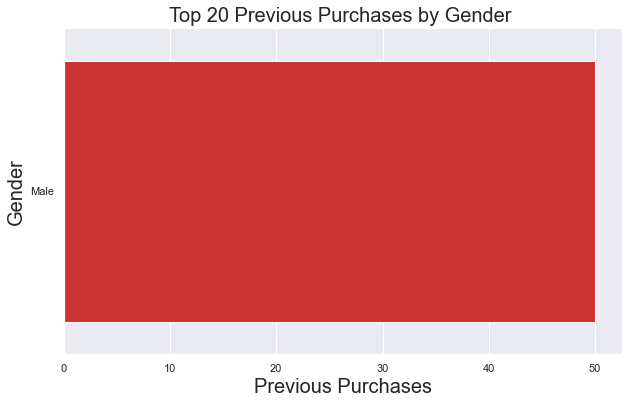

In [87]:
#Top 20 Previous Purchases by Gender
plt.figure(figsize=(10,6))
sns.barplot(x="Previous Purchases",y ="Gender",data=Previous_Purchases,palette="Set1")
plt.title("Top 20 Previous Purchases by Gender ",fontdict={"fontsize":20})
plt.xlabel("Previous Purchases",size =20)
plt.ylabel("Gender",size= 20)
plt.show()

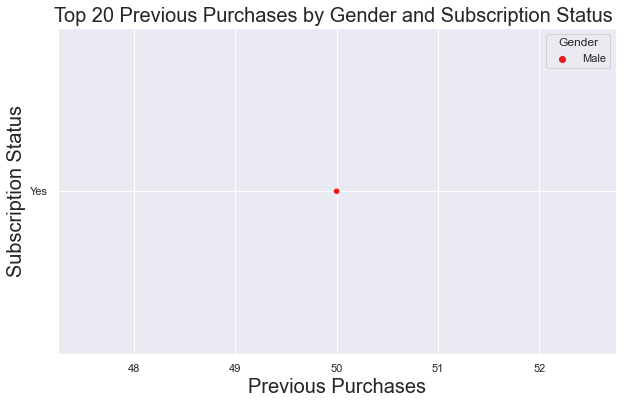

In [88]:
#Top 20 previous purchases by Gender and Subscription Status
plt.figure(figsize=(10,6))
sns.scatterplot(x="Previous Purchases",y ="Subscription Status",data=Previous_Purchases,hue="Gender",palette="Set1")
plt.title("Top 20 Previous Purchases by Gender and Subscription Status ",fontdict={"fontsize":20})
plt.xlabel("Previous Purchases",size =20)
plt.ylabel("Subscription Status",size= 20)
plt.show()

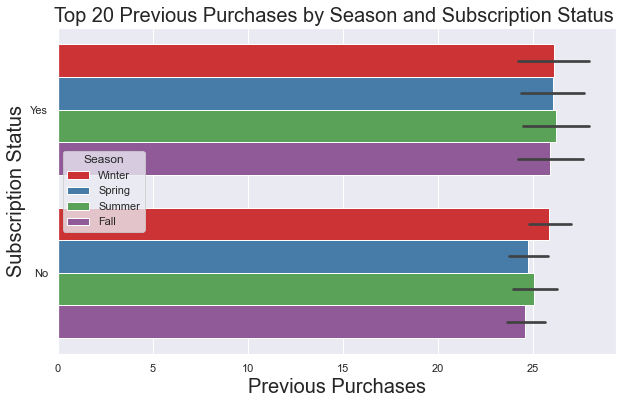

In [89]:
#Top 20 previous purchase by Gender and subscription status
plt.figure(figsize=(10,6))
sns.barplot(x="Previous Purchases",y ="Subscription Status",data=Shoppingtrends,hue="Season",palette="Set1")
plt.title("Top 20 Previous Purchases by Season and Subscription Status ",fontdict={"fontsize":20})
plt.xlabel("Previous Purchases",size =20)
plt.ylabel("Subscription Status",size= 20)
plt.show()
#categorising them fom the hottest to the coldest
#summer
#spring
#fall
#winter

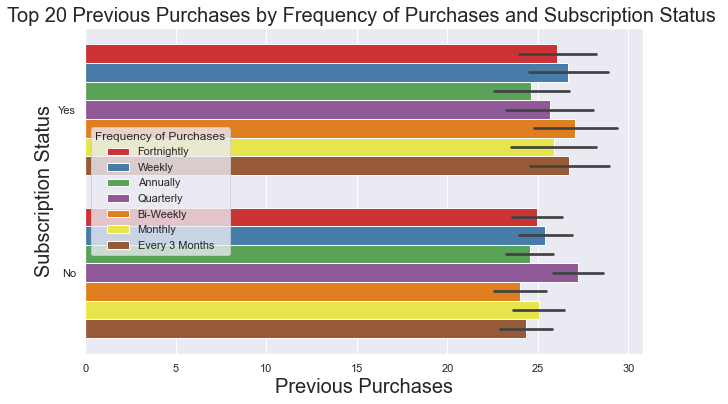

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(x="Previous Purchases",y ="Subscription Status",data=Shoppingtrends,hue="Frequency of Purchases",palette="Set1")
plt.title("Top 20 Previous Purchases by Frequency of Purchases and Subscription Status ",fontdict={"fontsize":20})
plt.xlabel("Previous Purchases",size =20)
plt.ylabel("Subscription Status",size= 20)
plt.show()

In [91]:
#Extracting a dataframe from the Dataset to be used for Random forest prediction and naming it
ShoppingtrendsRF=Shoppingtrends[['Age','Gender',"Review Rating","Frequency of Purchases",'Previous Purchases','Subscription Status']]
ShoppingtrendsRF

,Age,Gender,Review Rating,Frequency of Purchases,Previous Purchases,Subscription Status
0,55,Male,3.1,Fortnightly,14,Yes
1,19,Male,3.1,Fortnightly,2,Yes
2,50,Male,3.1,Weekly,23,Yes
3,21,Male,3.5,Weekly,49,Yes
4,45,Male,2.7,Annually,31,Yes
...,...,...,...,...,...,...
3895,40,Female,4.2,Weekly,32,No
3896,52,Female,4.5,Bi-Weekly,41,No
3897,46,Female,2.9,Quarterly,24,No
3898,44,Female,3.8,Weekly,24,No


In [92]:
#Renaming the Subscription Status column to remove the space in between
ShoppingtrendsRF = ShoppingtrendsRF.rename(columns = {"Subscription Status" : "SubscriptionStatus"})

In [93]:
#Confirming the Sunscription Status renaming that was done
ShoppingtrendsRF.head()

,Age,Gender,Review Rating,Frequency of Purchases,Previous Purchases,SubscriptionStatus
0,55,Male,3.1,Fortnightly,14,Yes
1,19,Male,3.1,Fortnightly,2,Yes
2,50,Male,3.1,Weekly,23,Yes
3,21,Male,3.5,Weekly,49,Yes
4,45,Male,2.7,Annually,31,Yes


In [94]:
#Converting Subsccription  Status from text to numbers
SubscriptionStatus_mapping = {"No":0, "Yes":1}
FrequencyofPurchases_mapping={"Fortnightly":0,'Weekly':1,'Annually':2,'Quarterly':4,'Bi-Weekly':5,'Monthly':6,'Every 3 Months':7}
ShoppingtrendsRF.SubscriptionStatus = ShoppingtrendsRF.SubscriptionStatus.map(SubscriptionStatus_mapping)
ShoppingtrendsRF["Frequency of Purchases"]=ShoppingtrendsRF["Frequency of Purchases"].map(FrequencyofPurchases_mapping)

In [95]:
FrequencyofPurchases_unique=ShoppingtrendsRF["Frequency of Purchases"].unique()
FrequencyofPurchases_unique

array([0, 1, 2, 4, 5, 6, 7], dtype=int64)

In [96]:
#Checking for the conversion done
ShoppingtrendsRF

,Age,Gender,Review Rating,Frequency of Purchases,Previous Purchases,SubscriptionStatus
0,55,Male,3.1,0,14,1
1,19,Male,3.1,0,2,1
2,50,Male,3.1,1,23,1
3,21,Male,3.5,1,49,1
4,45,Male,2.7,2,31,1
...,...,...,...,...,...,...
3895,40,Female,4.2,1,32,0
3896,52,Female,4.5,5,41,0
3897,46,Female,2.9,4,24,0
3898,44,Female,3.8,1,24,0


In [97]:
#renaming it to become input 
input = ShoppingtrendsRF.copy()

In [98]:
#Importing Library for LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [99]:
#converting the Gender column to dummy variable
le_Gender = LabelEncoder()


In [100]:
#Adding the encoded data for Gender into our extracted Data set for Random forest model after Subscription status has been dropped
input["Gender_x"] = le_Gender.fit_transform(input["Gender"])


In [101]:
#print the new data set after addition
input

,Age,Gender,Review Rating,Frequency of Purchases,Previous Purchases,SubscriptionStatus,Gender_x
0,55,Male,3.1,0,14,1,1
1,19,Male,3.1,0,2,1,1
2,50,Male,3.1,1,23,1,1
3,21,Male,3.5,1,49,1,1
4,45,Male,2.7,2,31,1,1
...,...,...,...,...,...,...,...
3895,40,Female,4.2,1,32,0,0
3896,52,Female,4.5,5,41,0,0
3897,46,Female,2.9,4,24,0,0
3898,44,Female,3.8,1,24,0,0


In [102]:
#drop the inital column(Gender) that has Gender in words
input_dummy = input.drop(["Gender"], axis = "columns")
input_dummy

,Age,Review Rating,Frequency of Purchases,Previous Purchases,SubscriptionStatus,Gender_x
0,55,3.1,0,14,1,1
1,19,3.1,0,2,1,1
2,50,3.1,1,23,1,1
3,21,3.5,1,49,1,1
4,45,2.7,2,31,1,1
...,...,...,...,...,...,...
3895,40,4.2,1,32,0,0
3896,52,4.5,5,41,0,0
3897,46,2.9,4,24,0,0
3898,44,3.8,1,24,0,0


# Feature Selection With Correlation Method¶

In [103]:
#using the corr mtd to find thier relationship
input_dummy_corr=input_dummy.corr()
input_dummy_corr

,Age,Review Rating,Frequency of Purchases,Previous Purchases,SubscriptionStatus,Gender_x
Age,1.000000,-0.021949,-0.013630,0.040445,0.006492,0.002763
Review Rating,-0.021949,1.000000,0.000341,0.004229,-0.006368,0.008164
Frequency of Purchases,-0.013630,0.000341,1.000000,-0.004911,-0.021658,-0.014793
Previous Purchases,0.040445,0.004229,-0.004911,1.000000,0.030859,0.035873
SubscriptionStatus,0.006492,-0.006368,-0.021658,0.030859,1.000000,0.417197
Gender_x,0.002763,0.008164,-0.014793,0.035873,0.417197,1.000000


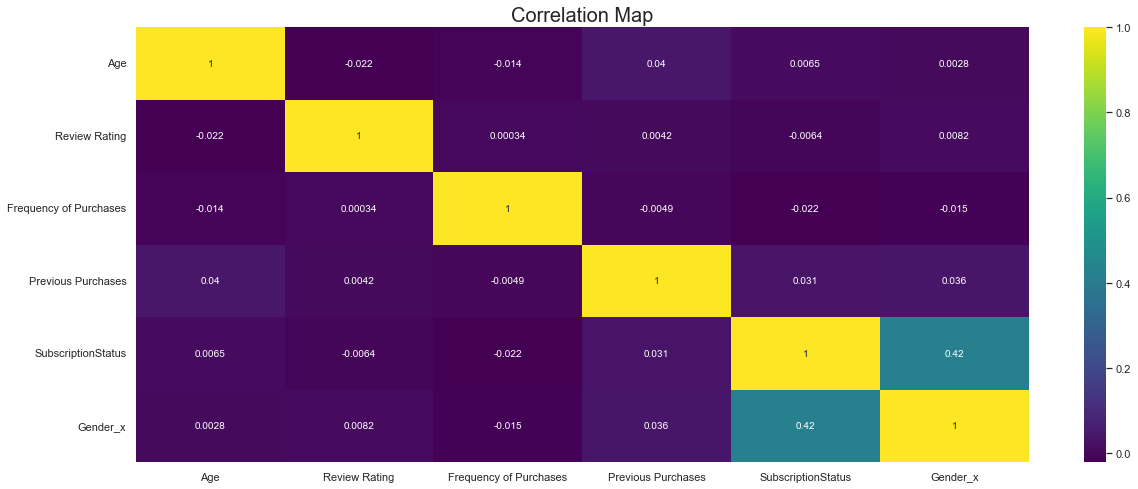

In [104]:
#visualizing correlation
plt.figure(figsize=(20,8))
sns.heatmap(data=input_dummy_corr,annot = True,cmap= "viridis")
plt.title("Correlation Map", fontdict={"fontsize":20})
plt.show()

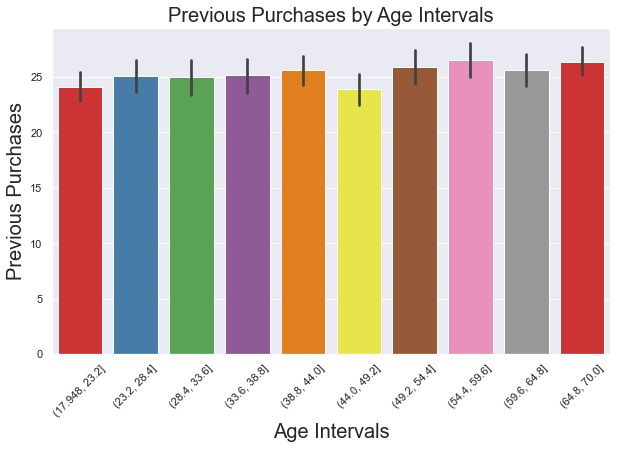

In [105]:
#visualizing the age range that affects the customer's behaviour the most 
# Create 10 equal-width intervals for the "Age" column
input_dummy['Age_intervals'] = pd.cut(input_dummy['Age'], bins=10)

# Plot the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="Age_intervals", y="Previous Purchases", data=input_dummy, palette="Set1",orient="v")
plt.title("Previous Purchases by Age Intervals", fontdict={"fontsize":20})
plt.xlabel("Age Intervals", size=20)
plt.ylabel("Previous Purchases", size=20)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

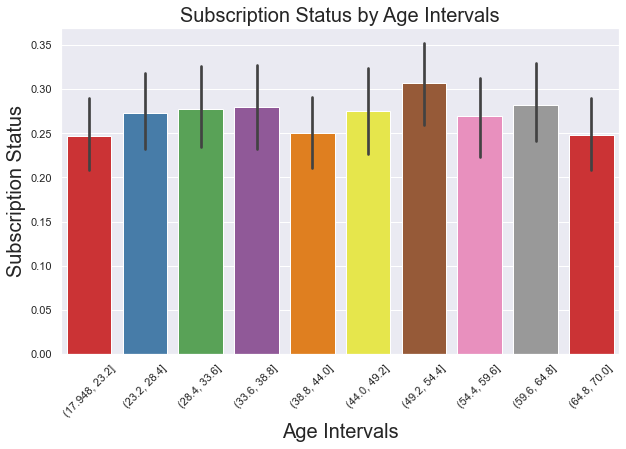

In [106]:
#visualizing the age range that affects the customer's behaviour the most 
# Create 10 equal-width intervals for the "Age" column
input_dummy['Age_intervals'] = pd.cut(input_dummy['Age'], bins=10)

# Plot the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="Age_intervals", y="SubscriptionStatus", data=input_dummy, palette="Set1",orient="v")
plt.title("Subscription Status by Age Intervals", fontdict={"fontsize":20})
plt.xlabel("Age Intervals", size=20)
plt.ylabel("Subscription Status", size=20)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [107]:
#spliting the input data into the dependent and the independent variable
X=input_dummy.drop(input_dummy[["SubscriptionStatus","Age_intervals"]], axis = 1)#independent variables

In [108]:
X

,Age,Review Rating,Frequency of Purchases,Previous Purchases,Gender_x
0,55,3.1,0,14,1
1,19,3.1,0,2,1
2,50,3.1,1,23,1
3,21,3.5,1,49,1
4,45,2.7,2,31,1
...,...,...,...,...,...
3895,40,4.2,1,32,0
3896,52,4.5,5,41,0
3897,46,2.9,4,24,0
3898,44,3.8,1,24,0


In [109]:
y=input_dummy[["SubscriptionStatus"]]#dependent variables or target
y

,SubscriptionStatus
0,1
1,1
2,1
3,1
4,1
...,...
3895,0
3896,0
3897,0
3898,0


In [110]:
scaler =StandardScaler()
scaler

StandardScaler()

In [111]:
X_normalize =pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_normalize

,Age,Review Rating,Frequency of Purchases,Previous Purchases,Gender_x
0,0.718913,-0.907584,-1.478829,-0.785831,0.685994
1,-1.648629,-0.907584,-1.478829,-1.616552,0.685994
2,0.390088,-0.907584,-1.069094,-0.162789,0.685994
3,-1.517099,-0.349027,-1.069094,1.637107,0.685994
4,0.061263,-1.466141,-0.659359,0.391025,0.685994
...,...,...,...,...,...
3895,-0.267563,0.628448,-1.069094,0.460252,-1.457738
3896,0.521618,1.047366,0.569847,1.083293,-1.457738
3897,0.127028,-1.186862,0.160112,-0.093563,-1.457738
3898,-0.004502,0.069891,-1.069094,-0.093563,-1.457738


In [112]:
#spliting the data into training and testing data random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y, test_size=0.2, random_state=42)

In [113]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [114]:
# Reshape the target variable y_train to a 1d array
y_train_reshaped = np.ravel(y_train)
y_train_reshaped

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [115]:
# Train the classifier
rf_classifier.fit(X_train, y_train_reshaped)

RandomForestClassifier(random_state=42)

In [116]:
len(y_test)

780

In [117]:
len(X_train)

3120

In [118]:
# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)
y_pred 

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [119]:
#getting the mdel score
rf_classifier.score(X_train, y_train_reshaped)
#Although it has a very accurate and good model score,
#However,the model accuracy alone may not provide a complete picture of the model's performance,
#That's why we had to proceed further to get other model's performances

0.9993589743589744

In [120]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.6717948717948717
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.84      0.79       558
           1       0.38      0.24      0.29       222

    accuracy                           0.67       780
   macro avg       0.56      0.54      0.54       780
weighted avg       0.63      0.67      0.65       780

Confusion Matrix:
 [[471  87]
 [169  53]]


In [121]:
# Feature Importance
#feature importance is a valuable tool for understanding and interpreting the behavior of machine learning models,
#particularly in identifying the most relevant factors influencing the predictions.
feature_importances = rf_classifier.feature_importances_
print("\nFeature Importance:")
for feature_name, importance in zip(X.columns, feature_importances):
    print(feature_name, ":", importance)


Feature Importance:
Age : 0.26139604647978393
Review Rating : 0.20062499777506496
Frequency of Purchases : 0.10406633539326082
Previous Purchases : 0.25768616536193667
Gender_x : 0.17622645498995365


# Explore potential strategies to improve the model's accuracy and generalizability.

To Explore potential strategies to improve the model's accuracy and generalizability, we can use any of the Techniques below:

using the third Techniques which is the Ensemble Methods:

In [122]:
#Importing the necessary Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import  XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 

In [123]:
classifiers=[LogisticRegression(random_state=42),RandomForestClassifier(random_state=42), 
            SVC(random_state=42),XGBClassifier(random_state=42)]
model_names= ["Logistic Regression","Random Forest", "Support Vector Machine","XGradient boost"]

In [124]:
def train_val_models(classifiers, model_names, X_train, X_test, y_train, y_test):
    reports = []
    for clf, model in zip(classifiers, model_names):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        report = classification_report(y_test, y_pred)
        reports.append(report)
    return model_names, reports

In [125]:
model_names, report = train_val_models(classifiers, model_names, X_train, X_test, y_train, y_test)

In [126]:
for name, report in zip(model_names, report):
    print(name)
    print(report)
    print("\n\n")

Logistic Regression
              precision    recall  f1-score   support

           0       0.72      1.00      0.83       558
           1       0.00      0.00      0.00       222

    accuracy                           0.72       780
   macro avg       0.36      0.50      0.42       780
weighted avg       0.51      0.72      0.60       780




Random Forest
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       558
           1       0.38      0.24      0.29       222

    accuracy                           0.67       780
   macro avg       0.56      0.54      0.54       780
weighted avg       0.63      0.67      0.65       780




Support Vector Machine
              precision    recall  f1-score   support

           0       0.72      1.00      0.83       558
           1       0.00      0.00      0.00       222

    accuracy                           0.72       780
   macro avg       0.36      0.50      0.42       780
weighted av

# TO FURTHER IMPROVE THE PERFORMANCE OF THE MODEL WE CAN ADD MORE COLUMNS TO THE INDEPENDENT VARIABLE 

In [127]:
Shoppingtrends

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [128]:
#Extracting a dataframe from the Dataset to be used for Random forest prediction and naming it
ShoppingtrendsRF=Shoppingtrends[['Age','Gender',"Review Rating","Frequency of Purchases",'Previous Purchases','Subscription Status',"Size","Discount Applied","Promo Code Used"]]
ShoppingtrendsRF

,Age,Gender,Review Rating,Frequency of Purchases,Previous Purchases,Subscription Status,Size,Discount Applied,Promo Code Used
0,55,Male,3.1,Fortnightly,14,Yes,L,Yes,Yes
1,19,Male,3.1,Fortnightly,2,Yes,L,Yes,Yes
2,50,Male,3.1,Weekly,23,Yes,S,Yes,Yes
3,21,Male,3.5,Weekly,49,Yes,M,Yes,Yes
4,45,Male,2.7,Annually,31,Yes,M,Yes,Yes
...,...,...,...,...,...,...,...,...,...
3895,40,Female,4.2,Weekly,32,No,L,No,No
3896,52,Female,4.5,Bi-Weekly,41,No,L,No,No
3897,46,Female,2.9,Quarterly,24,No,L,No,No
3898,44,Female,3.8,Weekly,24,No,S,No,No


In [129]:
# checking the unique values for the column below 
size_mapping = ShoppingtrendsRF["Size"].unique()
size_mapping

array(['L', 'S', 'M', 'XL'], dtype=object)

In [130]:
DiscountApplied_mapping =ShoppingtrendsRF["Discount Applied"].unique()
DiscountApplied_mapping

array(['Yes', 'No'], dtype=object)

In [131]:
PromoCodeUsed_mapping=ShoppingtrendsRF['Promo Code Used'].unique()
PromoCodeUsed_mapping

array(['Yes', 'No'], dtype=object)

In [132]:
PromoCodeUsed_mapping=ShoppingtrendsRF['Promo Code Used'].unique()
PromoCodeUsed_mapping

array(['Yes', 'No'], dtype=object)

In [133]:
Gender_map=ShoppingtrendsRF["Gender"].unique()
Gender_map

array(['Male', 'Female'], dtype=object)

In [134]:
#Renaming the Subscription Status column to remove the space in between
ShoppingtrendsRF = ShoppingtrendsRF.rename(columns = {"Subscription Status" : "SubscriptionStatus"})

In [135]:
#Converting Subsccription  Status from text to numbers
SubscriptionStatus_mapping = {"No":0, "Yes":1}
FrequencyofPurchases_mapping={"Fortnightly":0,'Weekly':1,'Annually':2,'Quarterly':4,'Bi-Weekly':5,'Monthly':6,'Every 3 Months':7}
ShoppingtrendsRF.SubscriptionStatus = ShoppingtrendsRF.SubscriptionStatus.map(SubscriptionStatus_mapping)
ShoppingtrendsRF["Frequency of Purchases"]=ShoppingtrendsRF["Frequency of Purchases"].map(FrequencyofPurchases_mapping)
#converting Size column in to a mapped column
size_mapping = {"L":0,"S":1,"M":2,"XL":3}
ShoppingtrendsRF["Size"]=ShoppingtrendsRF["Size"].map(size_mapping)
#converting Discount Applied column in to a mapped column
DiscountApplied_mapping = {"No":0,"Yes":1}
ShoppingtrendsRF["Discount Applied"] =ShoppingtrendsRF["Discount Applied"].map(DiscountApplied_mapping) 
PromoCodeUsed_mapping={"No":0,"Yes":1}
ShoppingtrendsRF["Promo Code Used"]=ShoppingtrendsRF["Promo Code Used"].map(PromoCodeUsed_mapping)
#converting Gender column in to a mapped column
Gender_map={"Male":0,"Female":1}
ShoppingtrendsRF["Gender"]=ShoppingtrendsRF["Gender"].map(Gender_map)
ShoppingtrendsRF["Gender"]


0       0
1       0
2       0
3       0
4       0
       ..
3895    1
3896    1
3897    1
3898    1
3899    1
Name: Gender, Length: 3900, dtype: int64

In [136]:
ShoppingtrendsRF

,Age,Gender,Review Rating,Frequency of Purchases,Previous Purchases,SubscriptionStatus,Size,Discount Applied,Promo Code Used
0,55,0,3.1,0,14,1,0,1,1
1,19,0,3.1,0,2,1,0,1,1
2,50,0,3.1,1,23,1,1,1,1
3,21,0,3.5,1,49,1,2,1,1
4,45,0,2.7,2,31,1,2,1,1
...,...,...,...,...,...,...,...,...,...
3895,40,1,4.2,1,32,0,0,0,0
3896,52,1,4.5,5,41,0,0,0,0
3897,46,1,2.9,4,24,0,0,0,0
3898,44,1,3.8,1,24,0,1,0,0


In [137]:
#spliting the input data into the dependent and the independent variable
X=ShoppingtrendsRF.drop(ShoppingtrendsRF[["SubscriptionStatus"]], axis = 1)#independent variables

In [138]:
X

,Age,Gender,Review Rating,Frequency of Purchases,Previous Purchases,Size,Discount Applied,Promo Code Used
0,55,0,3.1,0,14,0,1,1
1,19,0,3.1,0,2,0,1,1
2,50,0,3.1,1,23,1,1,1
3,21,0,3.5,1,49,2,1,1
4,45,0,2.7,2,31,2,1,1
...,...,...,...,...,...,...,...,...
3895,40,1,4.2,1,32,0,0,0
3896,52,1,4.5,5,41,0,0,0
3897,46,1,2.9,4,24,0,0,0
3898,44,1,3.8,1,24,1,0,0


In [139]:
y=ShoppingtrendsRF[["SubscriptionStatus"]]

In [140]:
y

,SubscriptionStatus
0,1
1,1
2,1
3,1
4,1
...,...
3895,0
3896,0
3897,0
3898,0


In [141]:
scaler =StandardScaler()
scaler

StandardScaler()

In [142]:
X_normalize =pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_normalize

,Age,Gender,Review Rating,Frequency of Purchases,Previous Purchases,Size,Discount Applied,Promo Code Used
0,0.718913,-0.685994,-0.907584,-1.478829,-0.785831,-1.4,1.151339,1.151339
1,-1.648629,-0.685994,-0.907584,-1.478829,-1.616552,-1.4,1.151339,1.151339
2,0.390088,-0.685994,-0.907584,-1.069094,-0.162789,-0.4,1.151339,1.151339
3,-1.517099,-0.685994,-0.349027,-1.069094,1.637107,0.6,1.151339,1.151339
4,0.061263,-0.685994,-1.466141,-0.659359,0.391025,0.6,1.151339,1.151339
...,...,...,...,...,...,...,...,...
3895,-0.267563,1.457738,0.628448,-1.069094,0.460252,-1.4,-0.868554,-0.868554
3896,0.521618,1.457738,1.047366,0.569847,1.083293,-1.4,-0.868554,-0.868554
3897,0.127028,1.457738,-1.186862,0.160112,-0.093563,-1.4,-0.868554,-0.868554
3898,-0.004502,1.457738,0.069891,-1.069094,-0.093563,-0.4,-0.868554,-0.868554


In [147]:
#spliting the data into training and testing data random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y, test_size=0.2, random_state=42)

In [148]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [149]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [150]:
len(X_train)

3120

In [151]:
len(y_test)

780

In [152]:
# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)
y_pred 

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [153]:
#getting the mdel score
rf_classifier.score(X_train, y_train)
#Although it has a very accurate and good model score,
#However,the model accuracy alone may not provide a complete picture of the model's performance,
#That's why we had to proceed further to get other model's performances

0.9996794871794872

In [154]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8064102564102564
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86       558
           1       0.62      0.82      0.71       222

    accuracy                           0.81       780
   macro avg       0.77      0.81      0.78       780
weighted avg       0.83      0.81      0.81       780

Confusion Matrix:
 [[448 110]
 [ 41 181]]


The previous analysis demonstrates that incorporating additional columns into both independent and dependent variables enhances the accuracy of the model. Consequently, we can now place greater confidence in its predictions for metrics such as F1 score and precision. In the subsequent cell, we will introduce further columns to explore which algorithms are most suitable for predicting customer behavior.

# Getting the key features by checking for the feature importance 

In [159]:
# Feature Importance
#feature importance is a valuable tool for understanding and interpreting the behavior of machine learning models,
#particularly in identifying the most relevant factors influencing the predictions.
feature_importances = rf_classifier.feature_importances_
print("\nFeature Importance:")
for feature_name, importance in zip(X.columns, feature_importances):
    print(feature_name, ":", importance)


Feature Importance:
Age : 0.14351051655111374
Gender : 0.06177684984182646
Review Rating : 0.11879139794183928
Frequency of Purchases : 0.06557839459785594
Previous Purchases : 0.14246932490844152
Size : 0.0354491621012324
Discount Applied : 0.1955871068887962
Promo Code Used : 0.23683724716889454


The key features influencing customer purchase behavior are:

Promo Code Used: 0.2368

Discount Applied: 0.1956

Age: 0.1435

Previous Purchases: 0.1425

Review Rating: 0.1188

Frequency of Purchases: 0.0656

Gender: 0.0618

Size: 0.0354

These features are ranked based on their importance scores obtained from the Random Forest model. Features with higher importance scores have a greater impact on predicting customer purchase behavior.








# Using other algorithms

In [155]:
classifiers=[LogisticRegression(random_state=42),RandomForestClassifier(random_state=42), 
            SVC(random_state=42),XGBClassifier(random_state=42)]
model_names= ["Logistic Regression","Random Forest", "Support Vector Machine","XGradient boost"]

In [156]:
def train_val_models(classifiers, model_names, X_train, X_test, y_train, y_test):
    reports = []
    for clf, model in zip(classifiers, model_names):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        report = classification_report(y_test, y_pred)
        reports.append(report)
    return model_names, reports

In [157]:
model_names, report = train_val_models(classifiers, model_names, X_train, X_test, y_train, y_test)

In [158]:
for name, report in zip(model_names, report):
    print(name)
    print(report)
    print("\n\n")

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       558
           1       0.62      1.00      0.77       222

    accuracy                           0.83       780
   macro avg       0.81      0.88      0.81       780
weighted avg       0.89      0.83      0.83       780




Random Forest
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       558
           1       0.62      0.82      0.71       222

    accuracy                           0.81       780
   macro avg       0.77      0.81      0.78       780
weighted avg       0.83      0.81      0.81       780




Support Vector Machine
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       558
           1       0.62      1.00      0.77       222

    accuracy                           0.83       780
   macro avg       0.81      0.88      0.81       780
weighted av